In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

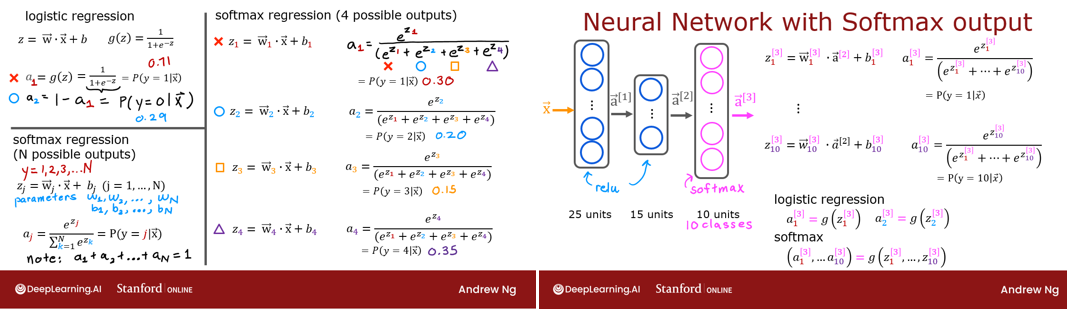

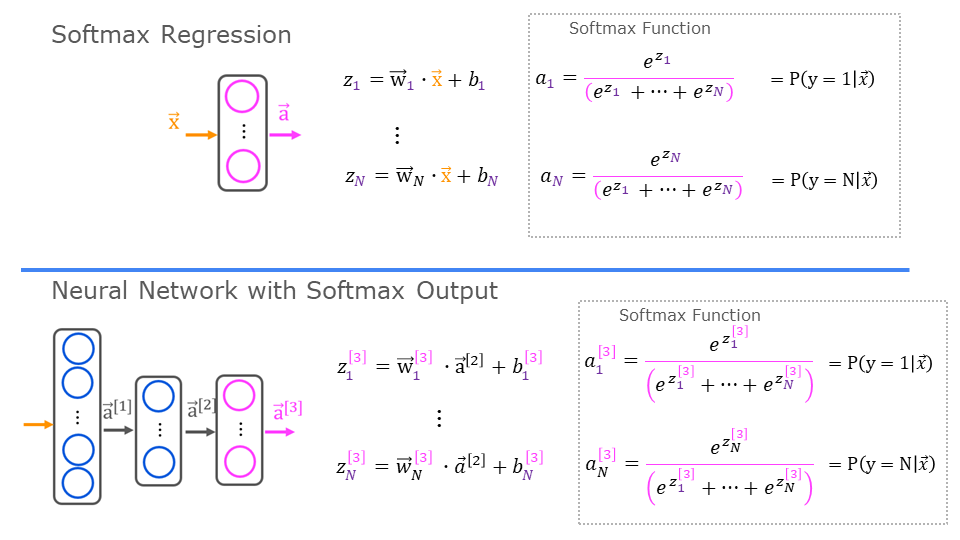

In [3]:
def my_softmax(z):
    ez = np.exp(z)
    softmax = ez / np.sum(ez)
    return softmax

- the exponential in the numerator magnifies small differences in the values
- output values sum to 1
- softmax spans across all of the outputs, change in value of one output will cause change in all

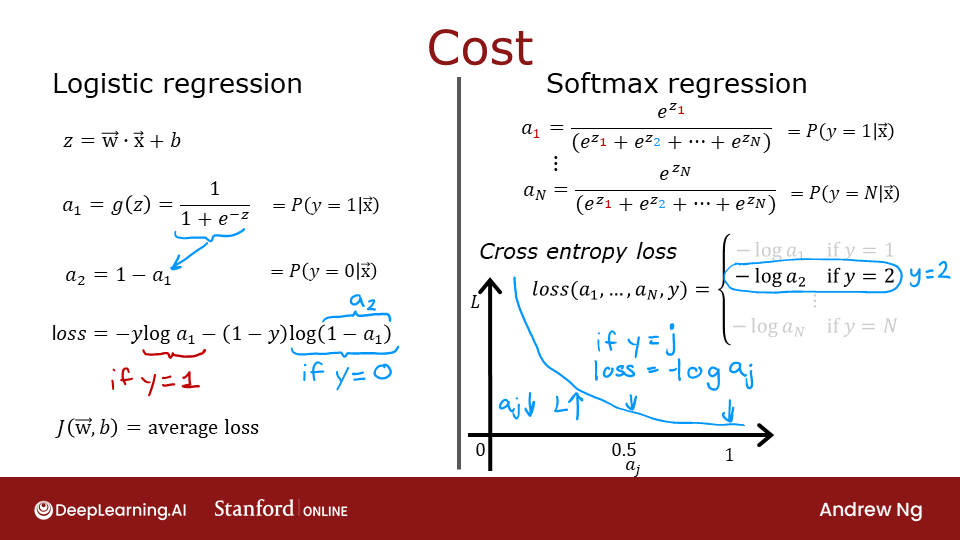

y is the target category for this example and $\mathbf{a}$ is the output of a softmax function  
In particular, the values in $\mathbf{a}$ are probabilities that sum to one.


The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


In [6]:
# coordinates of the centers of four clusters
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]

# function to generate synthetic dataset by creating sets of blobs around those centers
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

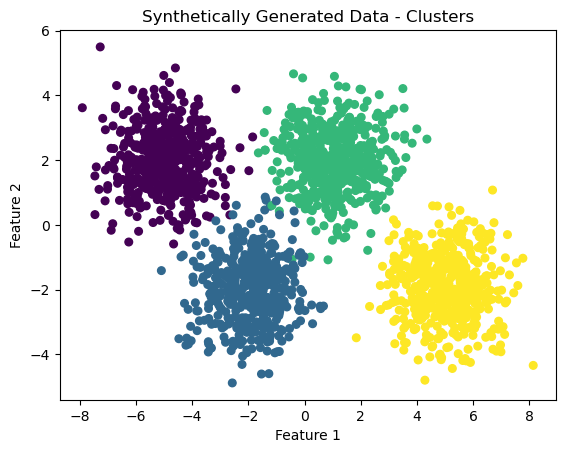

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetically Generated Data - Clusters")
plt.show()

In [10]:
class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(2, 25)
        self.layer2 = nn.Linear(25, 15)
        self.layer3 = nn.Linear(15, 4)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [21]:
model = MyModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

C:\Users\avira\AppData\Local\Temp\ipykernel_10848\607621015.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\avira\AppData\Local\Temp\ipykernel_10848\607621015.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)


In [22]:
# training loop
epochs = 100

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.5283
Epoch [20/100], Loss: 0.1320
Epoch [30/100], Loss: 0.0470
Epoch [40/100], Loss: 0.0358
Epoch [50/100], Loss: 0.0307
Epoch [60/100], Loss: 0.0264
Epoch [70/100], Loss: 0.0230
Epoch [80/100], Loss: 0.0203
Epoch [90/100], Loss: 0.0182
Epoch [100/100], Loss: 0.0167


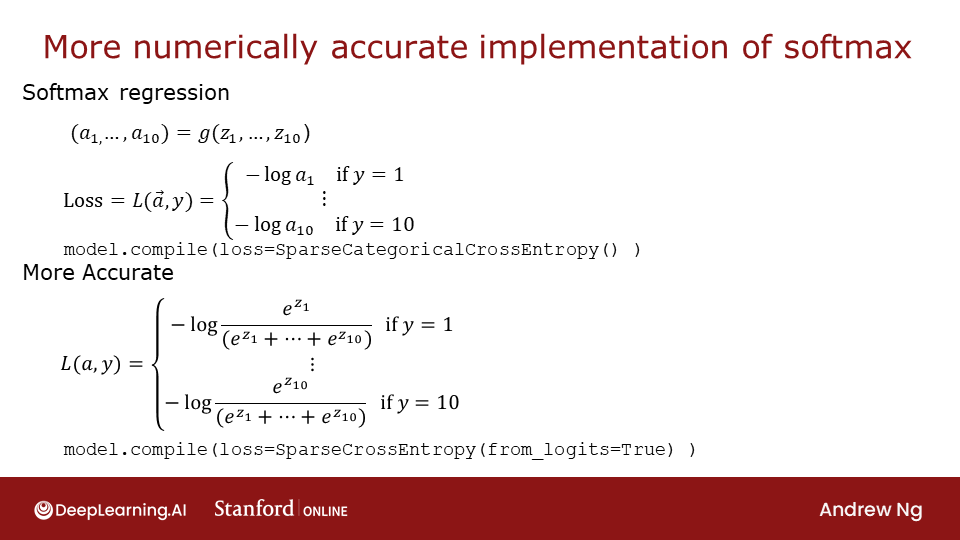  
more stable and accurate results can be obtained if the softmax and loss are combined during training